## INSIGHTS FROM FAILED ORDERS GOJEK

### ASSIGNMENT 

#### 1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

#### 2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

#### 3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

#### 4. Plot the distribution of average ETA by hours. How can this plot be explained?


### Data Preparation & Data Cleansing


        




In [688]:
pip install -r requirement.txt


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: C:\malik\python\PythonProject1\venv_pythonproject1\Scripts\python.exe -m pip install --upgrade pip


In [689]:
##The library that is being used.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [690]:
df_orders= pd.read_csv('data_orders.csv')

In [691]:
df_offers = pd.read_csv('data_offers.csv')

In [692]:
## Visualize the dataframe
df_orders.sample(n=5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
7575,01:55:24,-0.946178,51.447308,NaN,3000578950682,4,0,69.0
5487,23:27:36,-0.968949,51.454668,297.0,3000551431150,4,1,140.0
9766,23:49:15,-0.947315,51.444300,NaN,3000594471788,9,0,NaN
9102,21:33:02,-0.970779,51.468122,NaN,3000622491158,9,0,NaN
5347,15:31:16,-0.977197,51.431071,419.0,3000583640938,4,1,49.0


In [693]:
## Checking the dataframe
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [694]:
## Visualize the dataframe
df_offers.sample(n=5)

,order_gk,offer_id
14514,3000628632215,300052161014
260997,3000630732363,300052315343
38004,3000578676552,300050894141
67661,3000555121928,300050705548
260240,3000589255912,300051260242


In [695]:
## Checking the dataframe
df_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


#### Pertama saya meggabungkan file data_order.csv dan data_offer.csv menggunakan kata kunci Order_gk


In [696]:
##To facilitate data manipulation, the data_order.csv and data_offer.csv files should be merged 
##using the Order_id keyword with the inner merge function.

df_all= df_orders.merge(right=df_offers, how="inner", on="order_gk")

In [697]:
## Visualize the dataframe
df_all.sample(n=10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
22143,07:46:56,-0.950416,51.449490,1078.0,3000587131202,4,1,46.0,300051152765
22317,21:02:24,-0.964492,51.445990,179.0,3000587456452,4,1,351.0,300051171849
17411,08:56:32,-0.984552,51.474491,838.0,3000622818367,4,1,146.0,300051792930
11241,21:48:29,-0.939318,51.449746,778.0,3000592471525,4,1,584.0,300051376734
21558,07:08:43,-0.953193,51.471424,NaN,3000554046040,4,0,142.0,300050648905
6616,10:05:53,-0.967219,51.439306,838.0,3000578502051,4,1,97.0,300050883129
25934,17:06:24,-0.959527,51.456303,658.0,3000583667415,4,1,71.0,300051021789
24008,00:34:00,-0.946980,51.444158,958.0,3000625166265,4,1,136.0,300051976347
25415,15:26:17,-0.972142,51.458165,60.0,3000592970881,4,1,258.0,300051396134
4233,18:34:12,-0.977956,51.455214,178.0,3000591306080,4,1,65.0,300051350086


In [698]:
## Checking the dataframe
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   order_status_key               31268 non-null  int64  
 6   is_driver_assigned_key         31268 non-null  int64  
 7   cancellations_time_in_seconds  21795 non-null  float64
 8   offer_id                       31268 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.1+ MB


#### Then, to make the visualization easier to understand, a new column was added based on the following criteria:

#### The "is_driver_assigned_key" column changed the keyword "0" to "before assigned" and the keyword "1" to "after assigned".
#### The "order_status_key" column changed the keyword "4" to "client cancelled" and "9" to "system reject".

In [699]:
df_all['is_driver_assigned']= np.where(df_all['is_driver_assigned_key']==1, "After assigned", "Before assigned")

In [700]:
df_all['order_status']= np.where(df_all['order_status_key']==4, "client canceled", "system reject")

In [701]:
df_all= df_all.drop(columns=['is_driver_assigned_key'])

In [702]:
df_all=df_all.drop(columns=['order_status_key'])

In [703]:
#The column 'order_datetime' was changed to 'order_time' to correspond with the contents of the column.

df_all= df_all.rename(columns={'order_datetime': 'order_time'})

In [704]:
## Visualize the dataframe
df_all.sample(5)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
18639,15:25:28,-0.947076,51.448642,419.0,3000594921027,49.0,300051507332,After assigned,client canceled
24027,23:07:51,-0.971934,51.459879,NaN,3000625767348,NaN,300052003609,Before assigned,system reject
12272,23:07:06,-0.963610,51.472971,NaN,3000624467727,209.0,300051917371,Before assigned,client canceled
1327,23:03:05,-0.951614,51.451323,NaN,3000592497422,25.0,300051378592,Before assigned,client canceled
28374,16:41:09,-0.975500,51.431881,60.0,3000556246110,73.0,300050743559,After assigned,client canceled








#### Question 1 : Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?


#### As a first step towards a DataFrame that contains such aggregated information we group-by by the driver-assigned flag, and the order status, and then count the number of order_gk.

In [705]:
## Visualize the tabel
df1= df_all.groupby(["is_driver_assigned", "order_status"])["order_gk"].count().reset_index()
df1

,is_driver_assigned,order_status,order_gk
0,After assigned,client canceled,8360
1,After assigned,system reject,4
2,Before assigned,client canceled,13435
3,Before assigned,system reject,9469


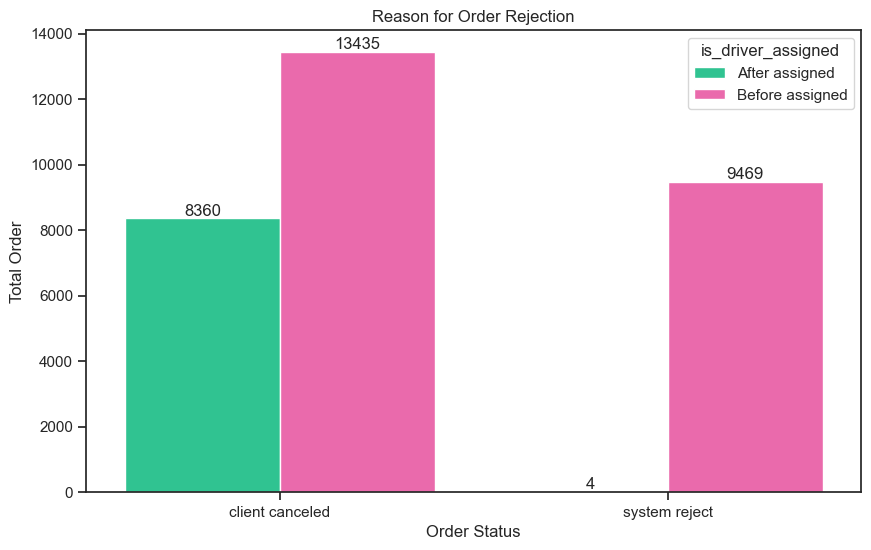

In [706]:
## Visualize the chart
sns.set_theme(style='ticks', palette=['#17db99', '#ff55ad'])

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(data=df1, y='order_gk', x='order_status', hue='is_driver_assigned')

ax.set(title='Reason for Order Rejection', xlabel='Order Status', ylabel='Total Order')

for i in ax.containers:
     ax.bar_label(i)

plt.show()


#### The highest order rejection from the chart is before driver assignment, for both client canceled or system reject categories

#### Question 2: Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

#### As a first step towards a DataFrame that contains such aggregated information we group-by by the order hour, the driver-assigned flag, and the order status, and then count the number of order_gk.

In [707]:
## Take hour from order_time column data
df_all['order_hour']= df_all['order_time'].str.split(":").apply(lambda split: split[0])

In [708]:
## Visualize the dataframe
df_all

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,After assigned,client canceled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,Before assigned,client canceled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,Before assigned,client canceled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,Before assigned,client canceled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,After assigned,client canceled,12
...,...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,43.0,300051590196,Before assigned,client canceled,12
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,44.0,300051590176,Before assigned,client canceled,12
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,36.0,300051648809,Before assigned,client canceled,13
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,34.0,300051648910,After assigned,client canceled,13


In [709]:
## Visualize the tabel of failed orders by hours

df2a= df_all.groupby(by='order_hour')['order_gk'].count().reset_index()
df2a

,order_hour,order_gk
0,00,1993
1,01,1305
2,02,1475
3,03,1418
4,04,227
5,05,111
6,06,392
7,07,1566
8,08,3865
9,09,1258


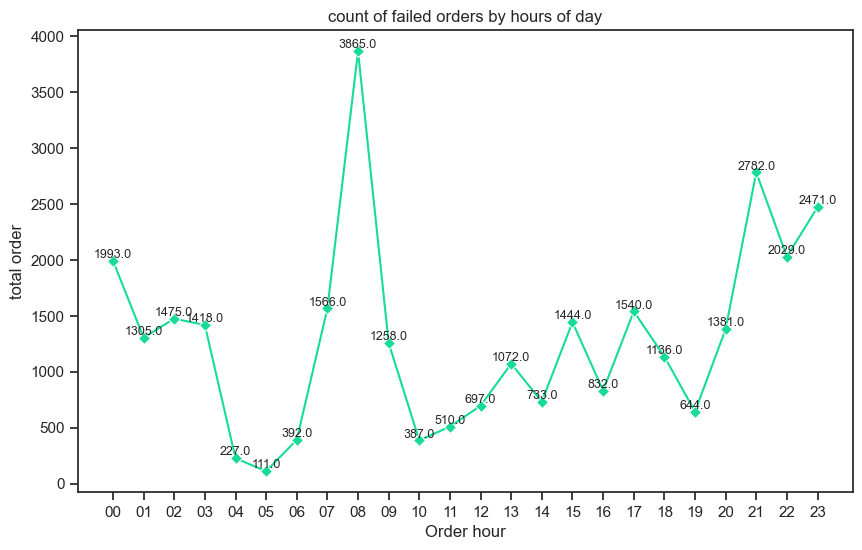

In [710]:
## Visualize the chart of failed orders by hours

sns.set_theme(style='ticks', palette=['#17db99'])

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=df2a, y='order_gk', x='order_hour', marker= 'D')

ax.set(title='count of failed orders by hours of day', xlabel='Order hour', ylabel='total order')

for index, row in df2a.iterrows():
    label = f"{row['order_gk']:.1f}"
    ax.text(row['order_hour'], row['order_gk'], label, 
            ha='center', va='bottom', fontsize=9)

In [711]:
## Visualize the tabel an abnormally high proportion of condition "is_driver_assigned" & "order_status"

df2b = df_all.groupby(['order_hour', 'is_driver_assigned', 'order_status'])['order_gk'].count().reset_index()
df2b['Condition'] = df2b['is_driver_assigned'] + ' - ' + df2b['order_status']
df2b

,order_hour,is_driver_assigned,order_status,order_gk,Condition
0,00,After assigned,client canceled,326,After assigned - client canceled
1,00,After assigned,system reject,4,After assigned - system reject
2,00,Before assigned,client canceled,957,Before assigned - client canceled
3,00,Before assigned,system reject,706,Before assigned - system reject
4,01,After assigned,client canceled,298,After assigned - client canceled
...,...,...,...,...,...
68,22,Before assigned,client canceled,954,Before assigned - client canceled
69,22,Before assigned,system reject,660,Before assigned - system reject
70,23,After assigned,client canceled,444,After assigned - client canceled
71,23,Before assigned,client canceled,1144,Before assigned - client canceled


#### The group-by operation results in the correct information. However, Pandas puts the group-by columns as indices in the resulting DataFrame. To manipulate it easier, we can call the reset_index to have the index columns as regular, data columns, and create a new, incrementing integer as an index.
#### We will create a multi-line plot, with the order hour on the horizontal axis, and multiple lines that count the number of orders per hour and per fail category. We specify the driver-assigned flag and the order status as columns attributes so that there is one line per combination of values, and then present the order_gk column as the values argument.

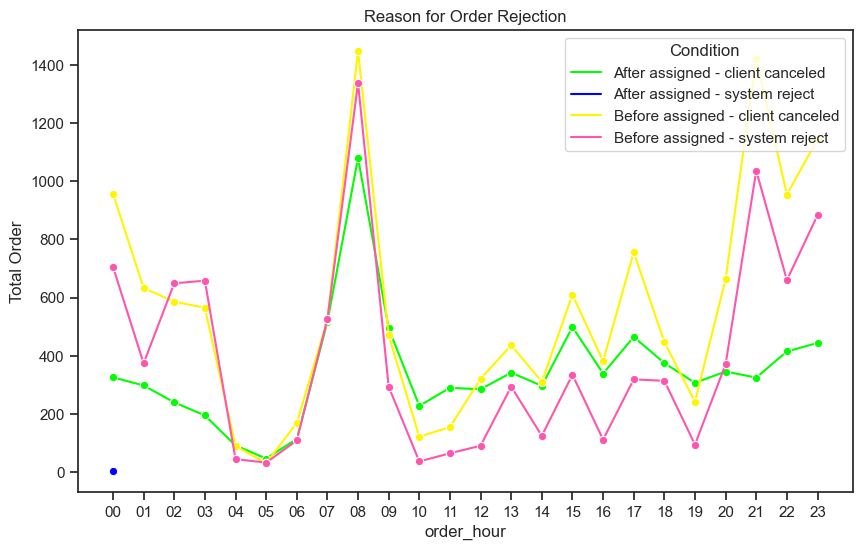

In [712]:
## Visualize the chart an abnormally high proportion of condition "is_driver_assigned" & "order_status"

sns.set_theme(style='ticks', palette=['#00FF00', '#0000FF', '#FFF500', '#ff55ad'])

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=df2b, y='order_gk', x='order_hour', hue='Condition', marker='o')
ax.set(title='Reason for Order Rejection', xlabel='order_hour', ylabel='Total Order')

plt.show()

#### The four system rejects with the assigned driver occurred around midnight (see the output of the grouped DataFrame). The rest of the categories follow similar distribution, with the client cancellations with the assigned driver having a substantially lower count during the night hours.



#### Question 3 : Plot the average time to cancellation with and without driver, by hour. Can we draw any conclusions from this plot?

#### To solve this question we are going to take the same approach as the previous question.
#### First, we will aggregatethe DataFrame by the order hour and the driver-assignment flag. Then, we will aggregate the cancellations_time_in_seconds column with the function mean. This will give us the required, aggregated information.

In [713]:
## Checking dataframe
df_all

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,After assigned,client canceled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,Before assigned,client canceled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,Before assigned,client canceled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,Before assigned,client canceled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,After assigned,client canceled,12
...,...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,43.0,300051590196,Before assigned,client canceled,12
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,44.0,300051590176,Before assigned,client canceled,12
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,36.0,300051648809,Before assigned,client canceled,13
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,34.0,300051648910,After assigned,client canceled,13


In [714]:
## Visualize the tabel
df3= df_all.groupby(["is_driver_assigned", "order_hour"])["cancellations_time_in_seconds"].mean().reset_index()
df3

,is_driver_assigned,order_hour,cancellations_time_in_seconds
0,After assigned,00,276.082822
1,After assigned,01,296.312081
2,After assigned,02,301.466667
3,After assigned,03,368.682051
4,After assigned,04,245.250000
5,After assigned,05,156.617021
6,After assigned,06,225.508772
7,After assigned,07,177.640232
8,After assigned,08,172.896296
9,After assigned,09,230.821862


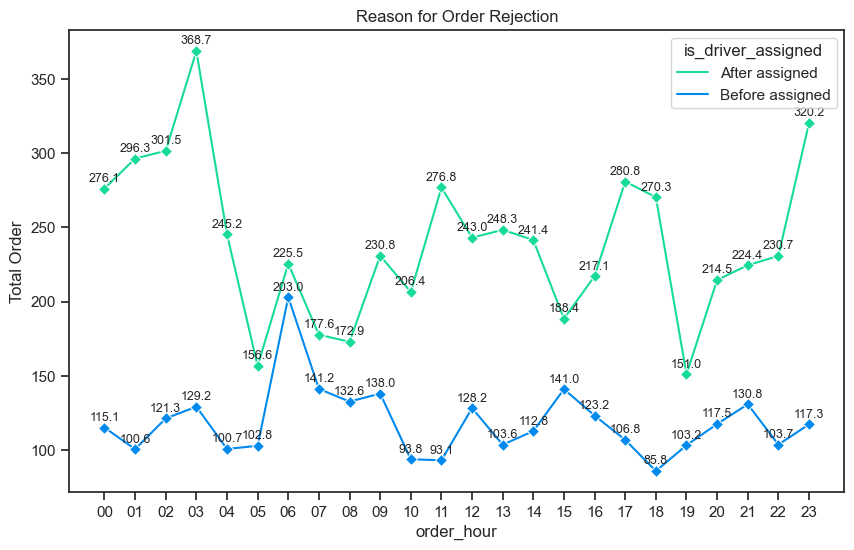

In [715]:
## Visualize the chart

sns.set_theme(style='ticks', palette=['#17db99', '#008aee'])

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=df3, y='cancellations_time_in_seconds', x='order_hour', hue='is_driver_assigned', marker= 'D')

ax.set(title='Reason for Order Rejection', xlabel='order_hour', ylabel='Total Order')

for index, row in df3.iterrows():
    label = f"{row['cancellations_time_in_seconds']:.1f}"
    ax.annotate(label, 
                (row['order_hour'], row['cancellations_time_in_seconds']),
                textcoords="offset points",
                xytext=(0,5), fontsize=9, 
                ha='center')


#### The average time to cancellation is higher on orders with an assigned driver than without, for each hour without exception. The peak occurs at 3 A.M. At this time there are a lot of client cancellations, so a logical explanation would be that clients have waited too long for the driver.


#### Question 4: Plot the distribution of average ETA (Estimate Time of Arrival) by hours. How can this plot be explained?

#### The solution to this question is quite straightforward. We simply group-by the DataFrame on the order hour, and aggregate the m_order_eta column with a mean function. Then, we plot the resulting DataFrame. The result is in the cell immediately below. 


In [716]:
## Visualize the tabel
df4 = df_all.groupby('order_hour', as_index=False)['m_order_eta'].mean().rename(columns={'m_order_eta': 'average'})
df4

,order_hour,average
0,00,375.433333
1,01,355.322148
2,02,389.554167
3,03,381.492308
4,04,266.119565
5,05,476.787234
6,06,489.456140
7,07,642.746615
8,08,671.086111
9,09,556.085020


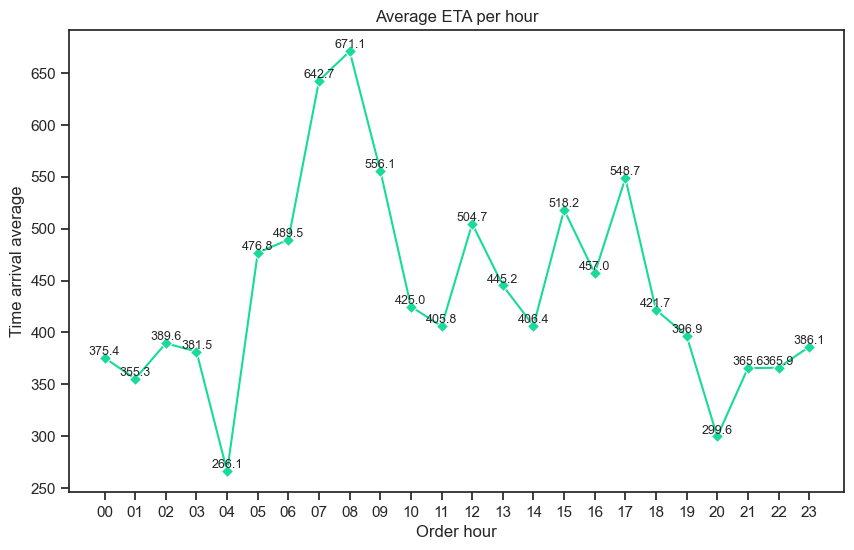

In [717]:
## Visualize the chart
sns.set_theme(style='ticks', palette=['#17db99'])

f, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=df4, y='average', x='order_hour', marker= 'D')

ax.set(title='Average ETA per hour', xlabel='Order hour', ylabel='Time arrival average')

for index, row in x.iterrows():
    label = f"{row['average']:.1f}"
    ax.text(row['order_hour'], row['average'], label, 
            ha='center', va='bottom', fontsize=9)
  

#### The line very closely matches the count of failed orders per hour, indicating that the number of failed orders increases as the average waiting time of the client increases.